In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Activation
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 1.Tỉ lệ 8:2

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [63]:
df_gold = pd.read_csv('/kaggle/input/metal-dataset/gold_price_2018_2024.csv')
df_gold

,Date,Value (USD per troy ounce)
0,2018-01-01,1307.018690
1,2018-01-02,1319.827953
2,2018-01-03,1311.501862
3,2018-01-04,1321.635371
4,2018-01-05,1319.589185
...,...,...
2339,2024-05-28,2353.805161
2340,2024-05-29,2357.459733
2341,2024-05-30,2335.806797
2342,2024-05-31,2346.815711


In [64]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

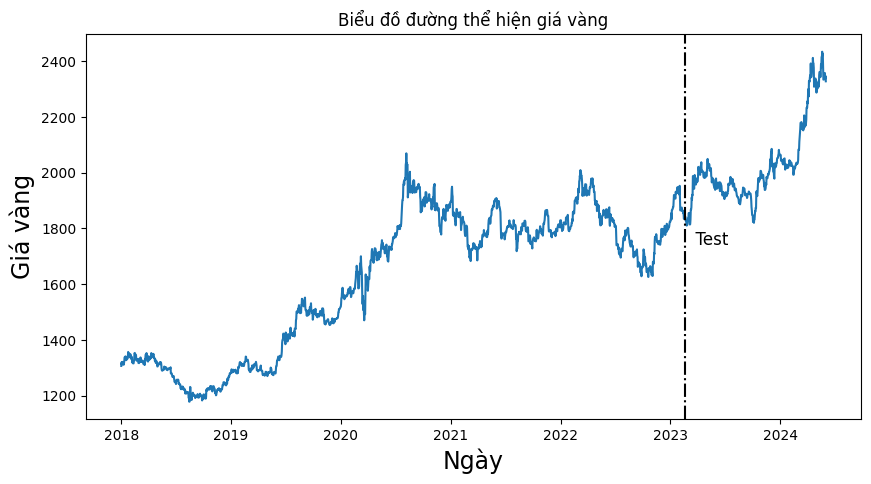

In [65]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.8)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [66]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [67]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [68]:
# Biến đổi mảng giá trị thành một bộ dữ liệu dạng ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [69]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [70]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [71]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [72]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0699 - val_loss: 0.0028
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 8.8720e-04 - val_loss: 0.0021
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 8.2221e-04 - val_loss: 0.0033
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 7.7691e-04 - val_loss: 0.0024
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 8.0725e-04 - val_loss: 0.0035
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 7.4785e-04 - val_loss: 0.0025
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 7.1264e-04 - val_loss: 0.0030
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 7.1838e-04 - val_loss: 0.0024
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 6.7703e-04 - val_loss: 0.0025
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 6.2479e-04 - val_loss: 0.0030
Epoch

#### Dự báo và trực quan hoá

In [73]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [74]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [75]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 30.010297534891404
Testing MAPE: 1.162725943023457
Testing MAE: 24.49587420665143


In [76]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


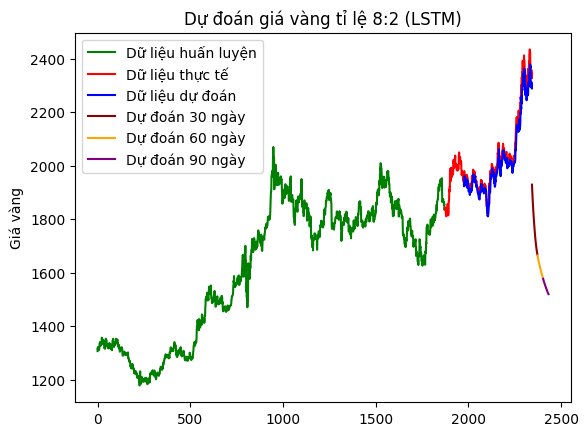

In [77]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng tỉ lệ 8:2 (LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [78]:
df_silver = pd.read_csv('/kaggle/input/metal-dataset/silver_price_2018_2024.csv')
df_silver

,Date,Value (USD per troy ounce)
0,2018-01-01,16.993771
1,2018-01-02,17.196475
2,2018-01-03,17.112426
3,2018-01-04,17.200338
4,2018-01-05,17.220985
...,...,...
2339,2024-05-28,31.790544
2340,2024-05-29,31.992130
2341,2024-05-30,31.825860
2342,2024-05-31,31.137894


In [79]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

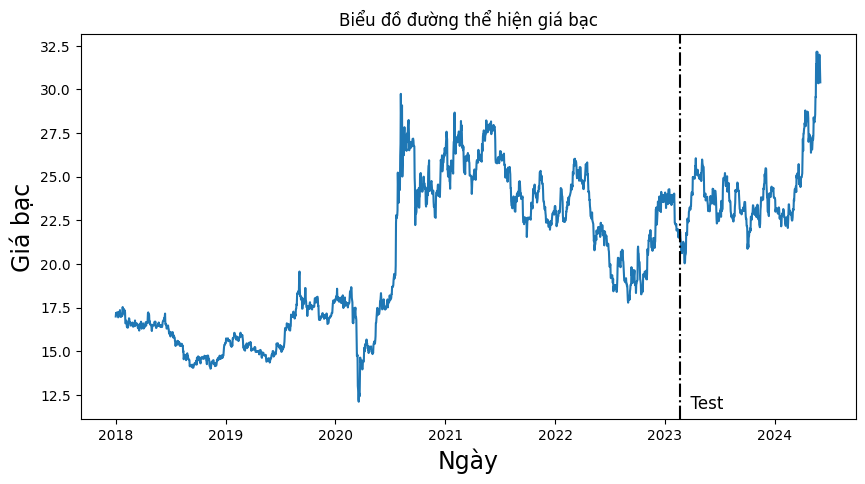

In [80]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.8)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [81]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [82]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [83]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [85]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [86]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0517 - val_loss: 0.0096
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3

#### Dự báo và trực quan hoá

In [87]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [88]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [89]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4273366208593363
Testing MAPE: 1.3595383608254163
Testing MAE: 0.33001004982870147


In [90]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


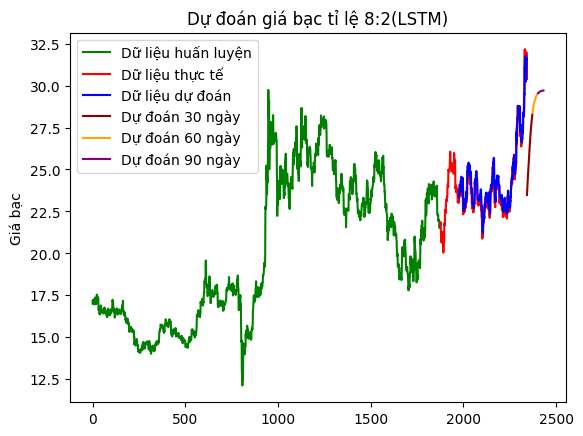

In [91]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 8:2(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [92]:
df_platium = pd.read_csv('/kaggle/input/metal-dataset/platium_price_2018_2024.csv')
df_platium

,Date,Value (USD per troy ounce)
0,2018-01-01,930.030587
1,2018-01-02,944.375754
2,2018-01-03,954.910273
3,2018-01-04,960.864535
4,2018-01-05,969.196081
...,...,...
2339,2024-05-28,1062.333141
2340,2024-05-29,1063.887962
2341,2024-05-30,1036.777827
2342,2024-05-31,1027.966127


In [93]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

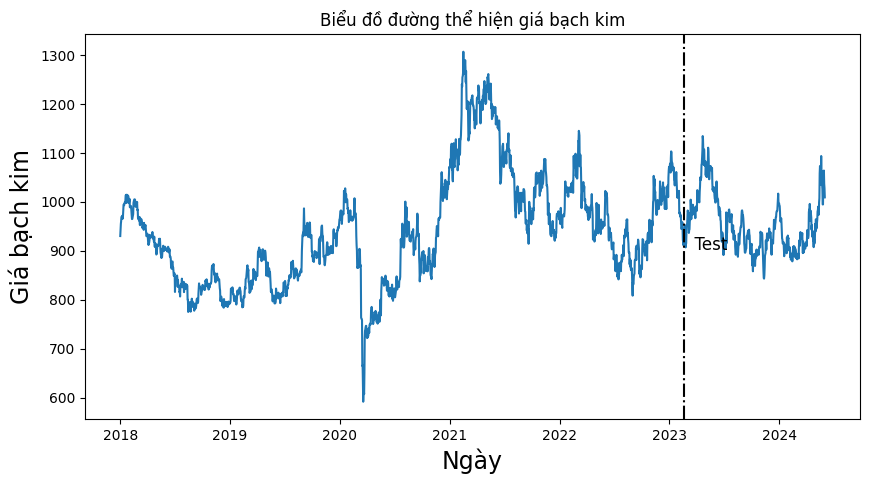

In [94]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.8)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [95]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [96]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [97]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [98]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [99]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [100]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.1226 - val_loss: 0.0075
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5

#### Dự báo và trực quan hoá

In [101]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [102]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [103]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 15.912700034262167
Testing MAPE: 1.2640512466400644
Testing MAE: 11.92978923739806


In [104]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


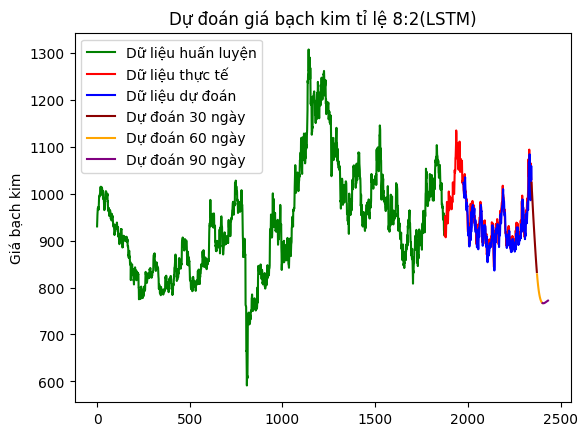

In [105]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 8:2(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()

## 1.Tỉ lệ 9:1

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [106]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

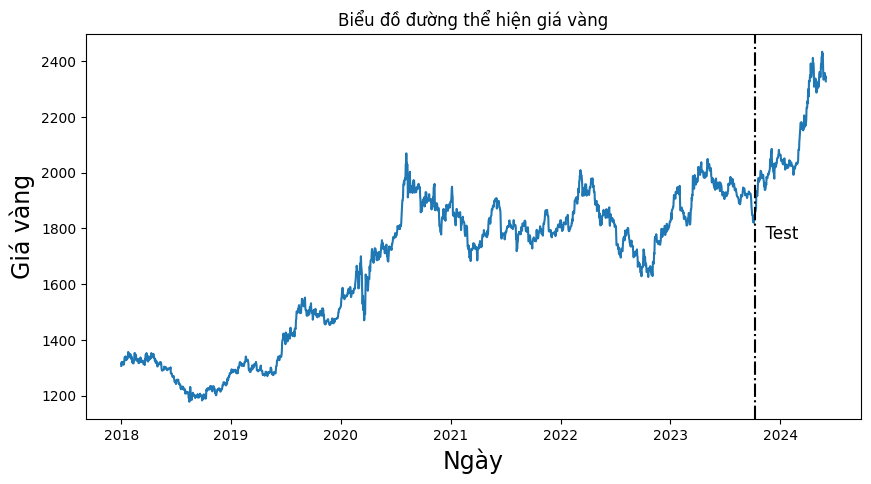

In [107]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.9)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [108]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [109]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [110]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [111]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [112]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [113]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0327 - val_loss: 0.0241
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0013 - val_loss: 0.0075
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 9.7077e-04 - val_loss: 0.0097
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 8.4952e-04 - val_loss: 0.0085
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 9.9101e-04 - val_loss: 0.0086
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 9.3803e-04 - val_loss: 0.0085
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 7.9018e-04 - val_loss: 0.0097
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 8.7875e-04 - val_loss: 0.0085
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 7.4936e-04 - val_loss: 0.0060
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 7.5075e-04 - val_loss: 0.0038
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 7.0378e-04 - val_loss: 0.0042
Epoch

#### Dự báo và trực quan hoá

In [114]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [115]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [116]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 22.671403686399998
Testing MAPE: 0.8484636762802213
Testing MAE: 18.538195813226295


In [117]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


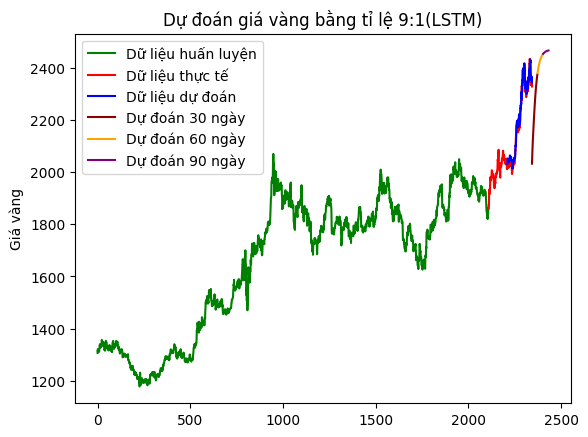

In [118]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng bằng tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [119]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

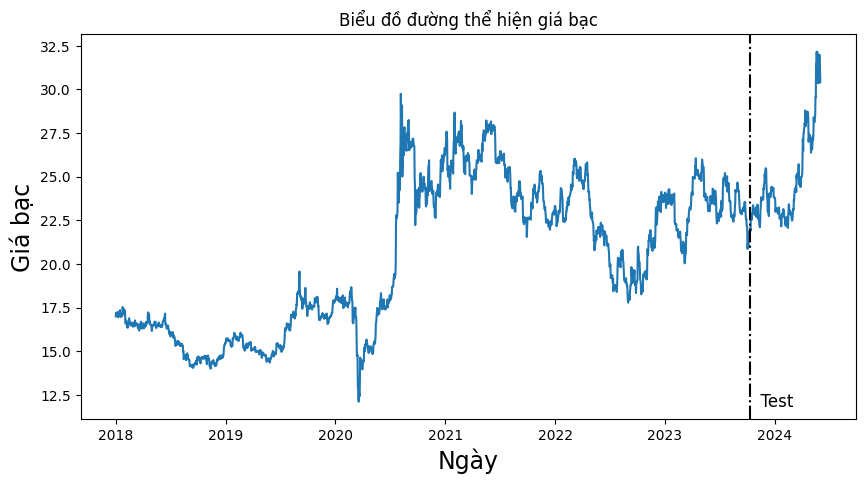

In [120]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.9)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [121]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [122]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [123]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [124]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [125]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [126]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0608 - val_loss: 0.0166
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0018 - val_loss: 0.0060
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0020 - val_loss: 0.0063
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4

#### Dự báo và trực quan hoá

In [127]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


In [128]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [129]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4905013193774552
Testing MAPE: 1.2183200100032714
Testing MAE: 0.3257232205881621


In [130]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


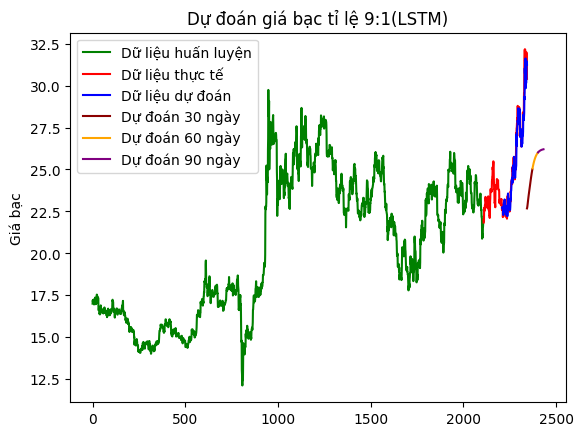

In [131]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [132]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

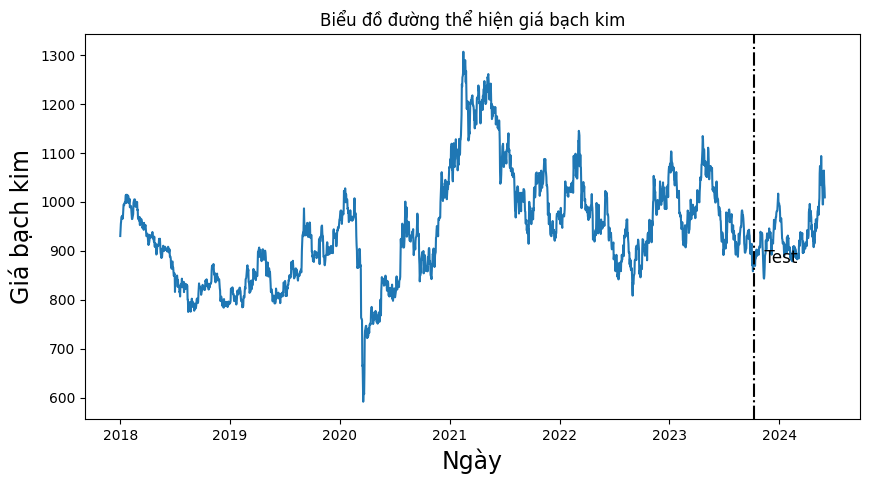

In [133]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.9)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [134]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [135]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [136]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [137]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [138]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0863 - val_loss: 0.0029
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5

#### Dự báo và trực quan hoá

In [140]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [141]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [142]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 16.23611558681873
Testing MAPE: 1.242188092594062
Testing MAE: 11.896444119374356


In [143]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


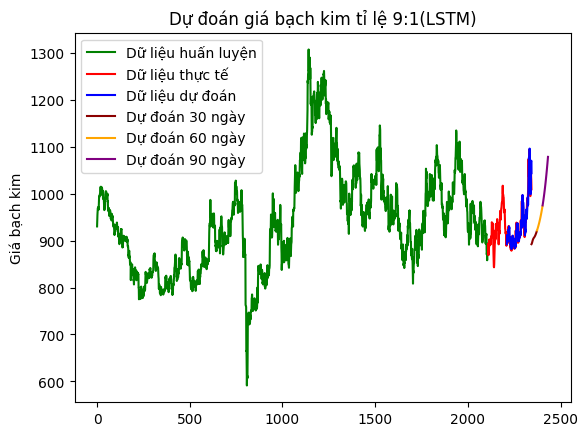

In [144]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()

## 1.Tỉ lệ 7:3

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [145]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

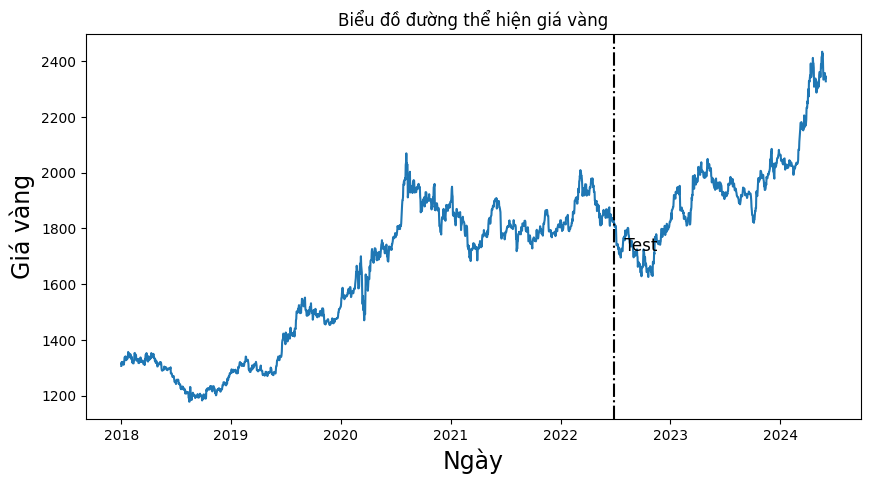

In [146]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.7)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [147]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [148]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1640, 1)
Test data size: (704, 1)


In [149]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [150]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1539, 100, 1)
Test data size shape: (603, 100, 1)


#### Tạo mô hình và train

In [151]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [152]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0677 - val_loss: 0.0028
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 7.0583e-04 - val_loss: 0.0029
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 8.2761e-04 - val_loss: 0.0031
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 7.5166e-04 - val_loss: 0.0028
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 7.3533e-04 - val_loss: 0.0020
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 7.5169e-04 - val_loss: 0.0024
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 6.9313e-04 - val_loss: 0.0027
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 7.4195e-04 - val_loss: 0.0017
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 7.1553e-04 - val_loss: 0.0017
Epoch 12/

#### Dự báo và trực quan hoá

In [153]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [154]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [155]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 18.856532865663947
Testing MAPE: 0.7635776438813766
Testing MAE: 14.96291263418234


In [156]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


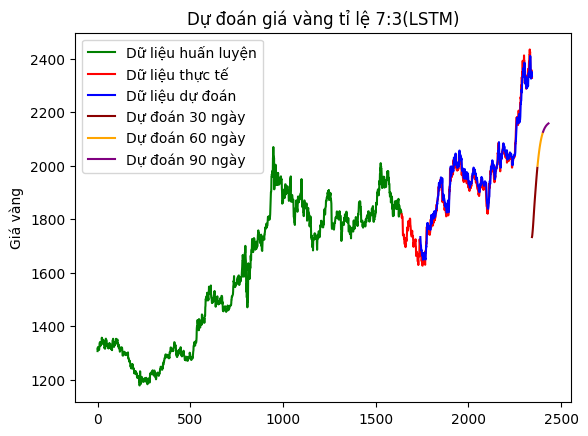

In [157]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [186]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

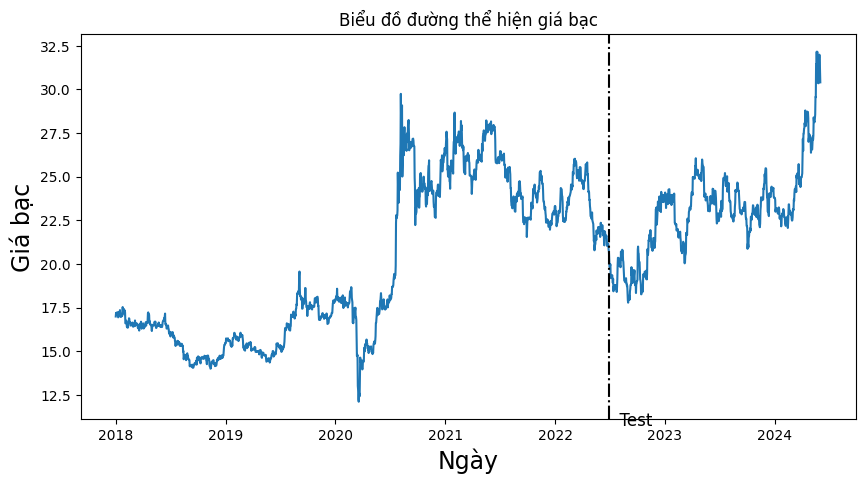

In [187]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.7)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [188]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [189]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1640, 1)
Test data size: (704, 1)


In [190]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [191]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1539, 100, 1)
Test data size shape: (603, 100, 1)


#### Tạo mô hình và train

In [192]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [193]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - loss: 0.0998 - val_loss: 0.0063
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3

#### Dự báo và trực quan hoá

In [166]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [167]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [168]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4016884127465475
Testing MAPE: 1.060076223645112
Testing MAE: 0.26523260374036606


In [169]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


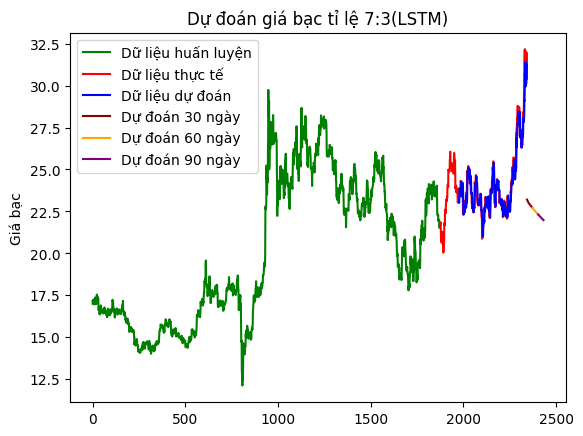

In [170]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [171]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

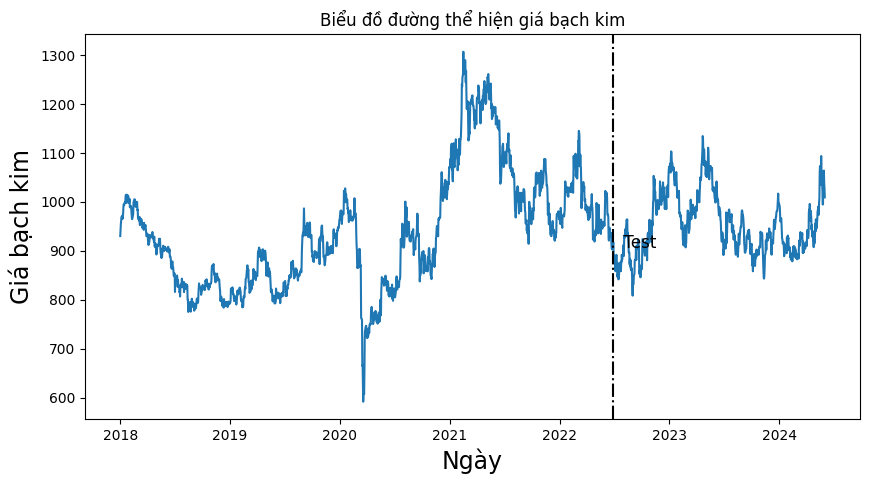

In [172]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.7)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [173]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [174]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [175]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [176]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [177]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [178]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.1226 - val_loss: 0.0081
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4

#### Dự báo và trực quan hoá

In [179]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [180]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [181]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 14.448898238958819
Testing MAPE: 1.1203889677477286
Testing MAE: 10.545258815244193


In [182]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


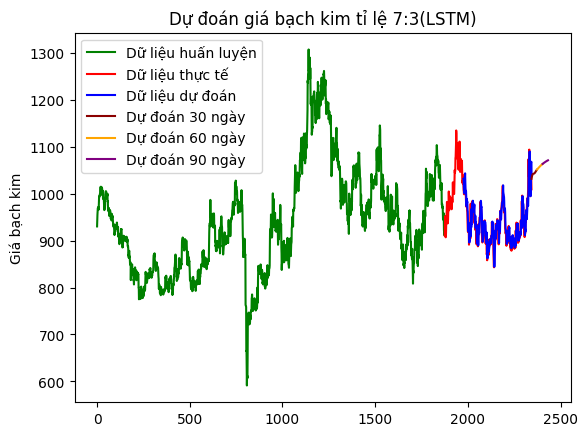

In [183]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()